# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_number = len(combined_df["Mouse ID"].unique())
mice_number

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows_df = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_df = duplicate_rows_df["Mouse ID"].unique()
duplicate_mouse_df

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = combined_df.set_index("Mouse ID")
duplicate_info.loc["g989"]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids
clean_data_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_total = len(clean_data_df ["Mouse ID"].unique())
cleaned_total

248

In [8]:
print(type(cleaned_total))

<class 'int'>


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_var,
                           "Tumor Volume Std. Dev.": tumor_var, "Tumor Volume Std. Dev.": tumor_std, "Tumor Volume Std. Err.": tumor_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

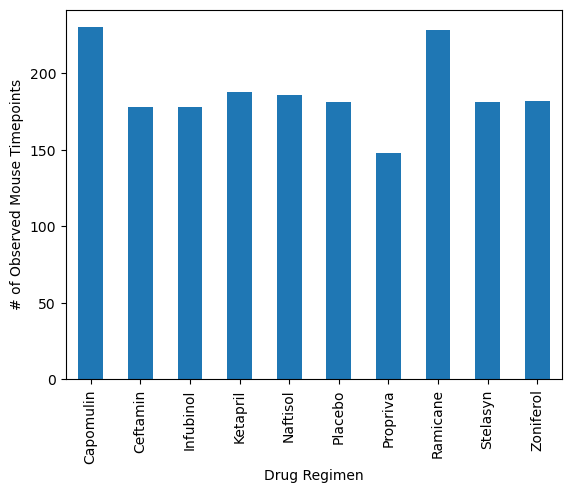

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar_chart = clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

pandas_bar_chart.plot.bar()

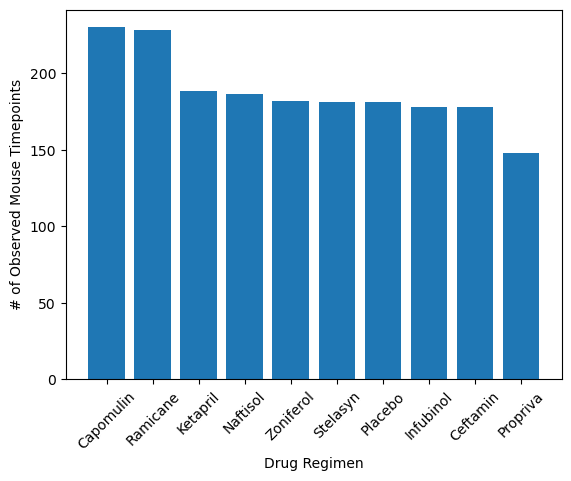

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar_chart = clean_data_df["Drug Regimen"].value_counts()

plt.bar(pyplot_bar_chart.index.values,pyplot_bar_chart.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sex'>

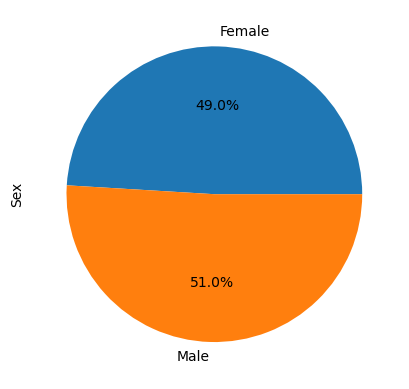

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandas_pie = clean_data_df.groupby(["Sex"])["Sex"].count()
gender_pandas_pie.plot.pie(autopct="%1.1f%%")

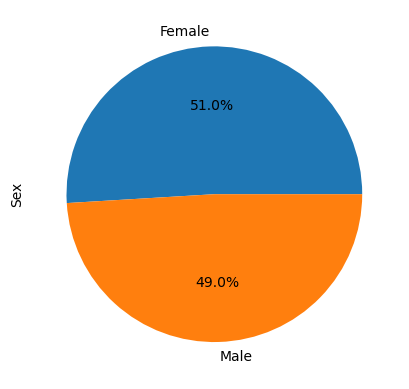

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot_pie =  clean_data_df["Sex"].value_counts()

plt.pie(gender_pyplot_pie.values, labels=gender_pandas_pie.index.values,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin, Ramicane, Infubinol, and Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tp_df = pd.merge(clean_data_df, max_tp, on=("Mouse ID", "Timepoint"), how='left')

max_tp_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [33]:
# Put treatments into a list for for loop (and later for plot labels)

tumor_volume_data = {"Capomulin": [],
                     "Ramicane": [],
                     "Infubinol": [],
                     "Ceftamin": []}

# Create empty list to fill with tumor vol data (for plotting)

capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_iqr = max_tp_df.quantile([0.25,0.5,0.75])
upper_quartile = quartiles[0.75]
lower_quartile = quartiles[0.25]
iqr = upper_quartile - lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
for name in treatment_regimens:
    for i in max_tp_df.index:
        if max_tp_df.iloc[i]["Drug Regimen"]==name:
            tumor_volume_data[name].append(max_tp_df).iloc[i]["Tumor Volume (3mm)"]
    # add subset 
    sub=max_tp_df[max_tp_df["Drug Regimen"]==name]
    
    # Determine outliers using upper and lower bounds
drug_outliers = max_tp_df.loc[(max_tp_df["Tumor Volume (mm3)"]>= upper_bound) |
                              (max_tp_df["Tumor Volume (mm3)"]<= lower_bound)]

drug_outliers

TypeError: unsupported operand type(s) for -: 'str' and 'str'

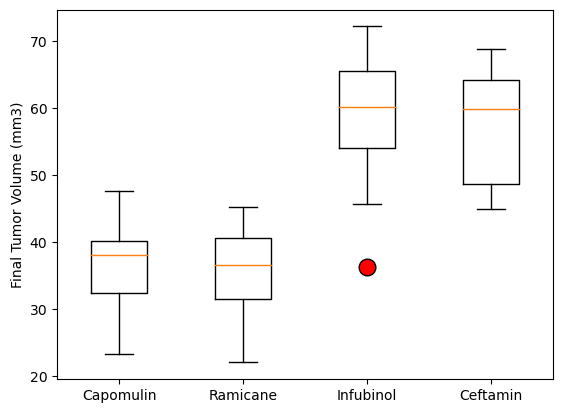

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_total["Drug Regimen"] == "Capomulin"
line_plot_df = capomulin_df["Mouse ID"]=="1509"

plt.title("Capomulin treatment of mouse 1509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (3mm)")
plt.plot(line_plot_df["Timepoint"], line_plot_df["Tumor Volume (3mm)"])

TypeError: 'int' object is not subscriptable

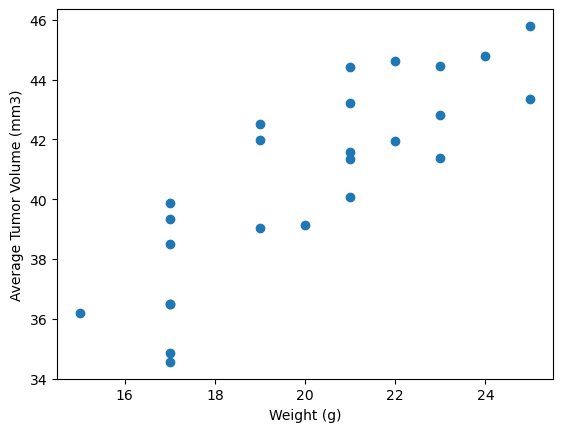

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


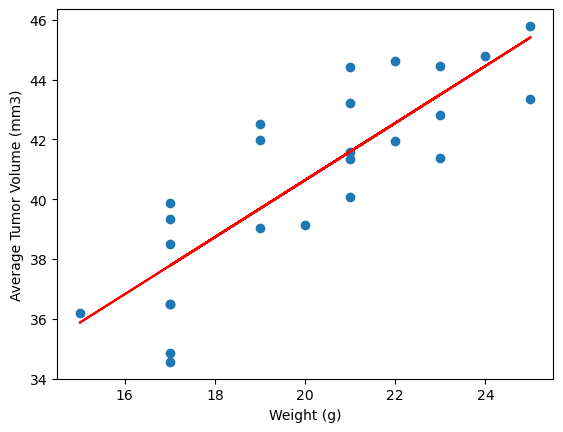

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
